In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as asc

In [2]:
df = pd.read_csv("../input/ee-769-assignment1/train.csv")
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [3]:
df["BusinessTravel"] = df["BusinessTravel"].astype('category')
df["Department"] = df["Department"].astype('category')
df["EducationField"] = df["EducationField"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["JobRole"] = df["JobRole"].astype('category')
df["MaritalStatus"] = df["MaritalStatus"].astype('category')
df["OverTime"] = df["OverTime"].astype('category')
df.dtypes

Age                            int64
Attrition                      int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
T

In [4]:
df["BusinessTravel"] = df["BusinessTravel"].cat.codes
df["Department"] = df["Department"].cat.codes
df["EducationField"] = df["EducationField"].cat.codes
df["Gender"] = df["Gender"].cat.codes
df["JobRole"] = df["JobRole"].cat.codes
df["MaritalStatus"] = df["MaritalStatus"].cat.codes
df["OverTime"] = df["OverTime"].cat.codes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,7,...,4,1,6,3,3,2,2,2,2,4


***Dividing into X and y***

In [5]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

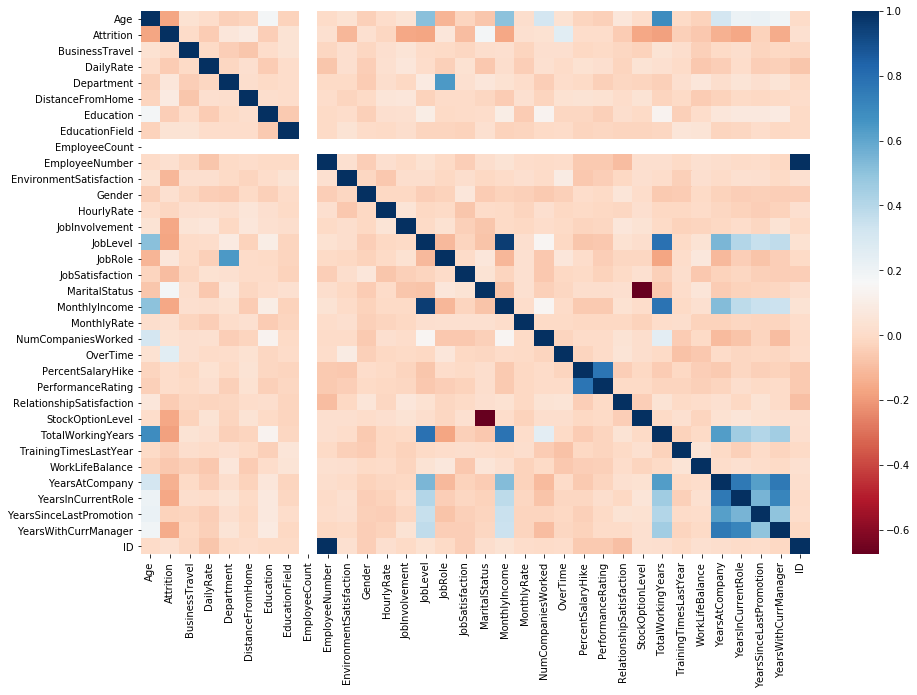

In [6]:
#Finding the correlation between features
fig, ax = plt.subplots(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [7]:
# We can see EmployeeCount, EmployeeNumber, ID are not of any significance for our analysis. So we drop them.
X = X.drop('EmployeeCount', axis = 1)
X = X.drop('EmployeeNumber', axis = 1)
X = X.drop('ID', axis = 1)
accuracy = []

**Splitting the Dataset**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 40)

> We will apply various approaches to train the model and then tune the model with best accuracy.

**Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC()
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)
print(f"accuracy of Random Forest Classifier for Testing data set is {asc(y_test, y_pred_rfc)}")
accuracy.append(asc(y_test, y_pred_rfc))

accuracy of Random Forest Classifier for Testing data set is 0.8478964401294499


**LDA Analysis**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(x_train, y_train)
y_pred=lda.predict(x_test)
print(f'Accuracy = {asc(y_pred, y_test)}')
acc_lda = asc(y_pred, y_test)
accuracy.append(acc_lda)

Accuracy = 0.8640776699029126


**QDA Analysis**

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(x_train, y_train)
y_pred=qda.predict(x_test)
print(f'Accuracy = {asc(y_pred, y_test)}')
acc_qda = asc(y_pred, y_test)
accuracy.append(acc_qda)

Accuracy = 0.8220064724919094


**ANN**

In [12]:
from sklearn.neural_network import MLPClassifier
acc = []
for i in range(1,10):
    mlp = MLPClassifier(hidden_layer_sizes = (i,), max_iter = 100, solver = 'lbfgs')
    mlp.fit(x_train, y_train)
    #rsq = metrics.r2_score(y_train, mlp.predict(x_train))
    y_pred=mlp.predict(x_test)
    #rsq_test = metrics.r2_score(y_test, mlp.predict(x_test))
    acc.append(asc(y_pred, y_test))
print(f'Best accuracy = {max(acc)} for hidden layer size = {acc.index(max(acc)) + 1}')
acc_ann = max(acc)
accuracy.append(acc_ann)

Best accuracy = 0.8220064724919094 for hidden layer size = 1


**KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
acc1 = []
for i in range(2,11):
    knc = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    knc.fit(x_train, y_train)
    #rsq = metrics.r2_score(y_train, knc.predict(x_train))
    #print(f'R2 = {rsq}')
    y_pred=mlp.predict(x_test)
    #rsq_test = metrics.r2_score(y_test, knc.predict(x_test))
    #print(f'R2 test = {rsq_test}')
    acc1.append(asc(y_pred, y_test))
    #print(f'Confusion matrix = {cm(y_pred, y_test)}')
    #print(f'Accuracy = {asc(y_pred, y_test)}')
print(f'Best accuracy = {max(acc1)} for k = {acc1.index(max(acc1)) + 2}')
accuracy.append(max(acc1))

Best accuracy = 0.5533980582524272 for k = 2


**SVM**

In [14]:
from sklearn.svm import SVC
clf_svm = SVC(C = 10000 ,gamma=0.0001)
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print(asc(y_test, y_pred))
accuracy.append(asc(y_test, y_pred))

0.8220064724919094


**Analysis**

In [15]:
approaches = ['Random Forest', 'LDA', 'QDA', 'ANN', 'KNN', 'SVM']
table = np.vstack((approaches, accuracy))
for x in range(len(table.T)):
    print(f'Accuracy of {table.T[x][0]} is {table.T[x][1]}')
bait = max(table[1])
app = []
for x in range(len(table.T)):
    
        if bait == table.T[x][1]:
            app.append(table.T[x][0])
            
        


print('*'*120)            
print(f'Hence, Best models are: {app}')

Accuracy of Random Forest is 0.8478964401294499
Accuracy of LDA is 0.8640776699029126
Accuracy of QDA is 0.8220064724919094
Accuracy of ANN is 0.8220064724919094
Accuracy of KNN is 0.5533980582524272
Accuracy of SVM is 0.8220064724919094
************************************************************************************************************************
Hence, Best models are: ['LDA']


**Predicting the output uaing LDA**

In [16]:
X_test = pd.read_csv("../input/ee-769-assignment1/test.csv")
X_test["BusinessTravel"] = X_test["BusinessTravel"].astype('category')
X_test["Department"] = X_test["Department"].astype('category')
X_test["EducationField"] = X_test["EducationField"].astype('category')
X_test["Gender"] = X_test["Gender"].astype('category')
X_test["JobRole"] = X_test["JobRole"].astype('category')
X_test["MaritalStatus"] = X_test["MaritalStatus"].astype('category')
X_test["OverTime"] = X_test["OverTime"].astype('category')
X_test.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

In [17]:
X_test["BusinessTravel"] = X_test["BusinessTravel"].cat.codes
X_test["Department"] = X_test["Department"].cat.codes
X_test["EducationField"] = X_test["EducationField"].cat.codes
X_test["Gender"] = X_test["Gender"].cat.codes
X_test["JobRole"] = X_test["JobRole"].cat.codes
X_test["MaritalStatus"] = X_test["MaritalStatus"].cat.codes
X_test["OverTime"] = X_test["OverTime"].cat.codes
Id = X_test['ID']
Id = np.asarray(Id)

In [18]:
X_test = X_test.drop('EmployeeCount', axis = 1)
X_test = X_test.drop('EmployeeNumber', axis = 1)
X_test = X_test.drop('ID', axis = 1)

In [19]:
y_pred_test = lda.predict(X_test)

In [20]:
output = np.vstack((Id,y_pred_test))

In [21]:
data = pd.DataFrame(output.T, columns = ['ID', 'Attrition'])
data.to_csv('output.csv', index = False)